In [10]:
import numpy as np
import matplotlib.pyplot as plt


# 2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
years = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
no_of_crimes = np.array([19446,21958,13535,21834,21710,20472,20614,18652,17524,17268,16452,15405,15466,13669,12123,11749,2886])

Initial = [22359,-0.006]


Jacobian = np.zeros([len(years), len(Initial)])
I = 0


while True:
    I += 1

    partial1 = np.exp(Initial[1]*years)
    partial2 = np.exp(Initial[1]*years)*Initial[0]*years
    
    Jacobian[:,0] = partial1
    Jacobian[:,1] = partial2
    
    
    residual = no_of_crimes - (Initial[0]*np.exp(Initial[1]*years))

    
    term1 = np.linalg.inv(np.dot(-1*Jacobian.T, Jacobian))
    term2 = np.dot(term1, Jacobian.T)
    term3 = np.dot(term2, residual)

    
    final = Initial - term3
    abs_error = abs(final-Initial)

    if max(abs_error) <= 1e-2:
        break
    Initial = final


constant1 = float('{:.4f}'.format(Initial[0]))
constant2 = float('{:.4f}'.format(Initial[1]))

print(f'Following were the constants are :\nC1 = {constant1}\nC2 = {constant2}\n\nIterations took to arrive at solution = {I}')



Following were the constants are :
C1 = 23322.436
C2 = -0.0402

Iterations took to arrive at solution = 8


[22403.46906219 21520.71190251 20672.73775794 19858.17608378
 19075.71033852 18324.0758559  17602.05780095 16908.48920647
 16242.24908691 15602.2606266  14987.48943928 14396.94189633
 13829.66352077 13284.73744458 12761.28292684 12258.45393017
 11775.43775336 11311.45371784 10865.75190585 10437.61194843
 10026.34186111  9631.27692547]


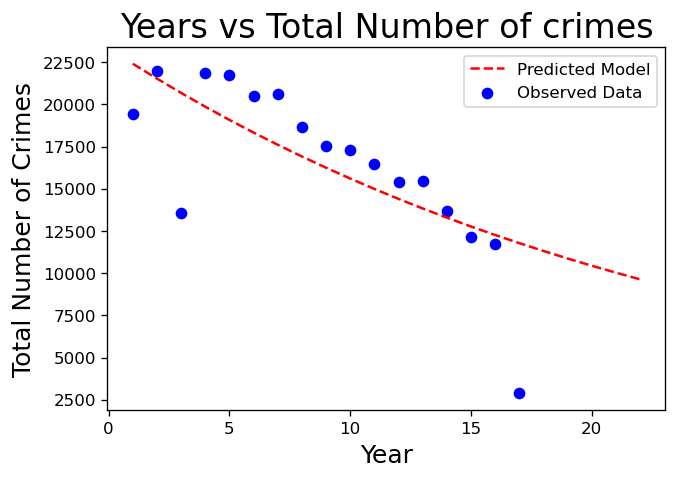

In [11]:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
pred = constant1*np.exp(constant2*x)
print(pred)

plt.figure(1, figsize = (6,4), dpi = 120)
plt.scatter(x=years, y=no_of_crimes, c='blue', marker='o', label ='Observed Data')
plt.plot(x,pred, 'r--', label='Predicted Model')
plt.xlabel("Year",fontsize=15)
plt.ylabel("Total Number of Crimes",fontsize=15)
plt.title('Years vs Total Number of crimes',fontsize=20)
plt.legend()


In [9]:
no_of_crimes=[]
y=19446
i=16
while y!=0:    
    y = 23322.4379 * np.exp(-0.0402*i)
    if y==0:
        #print(i)
        break
    i+=1
    
print(f'The number of crimes will become 0 after {i} years')


The number of crimes will become 0 after 18509 years
